# Credit Card Approval Prediction
                                                                by Zihao Li

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Understanding

In [2]:
# Read the data file
CC_data = pd.read_csv('data.csv', names=['Male','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income'])
CC_data2 = CC_data.copy()

In [11]:
CC_data.describe()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,1.689127,31.503813,4.829533,1.238897,1.238897,6.918836,2.153139,2.244296,1.465544,1.560490,2.502297,1.537519,1.165391,180.359877,1013.761103
std,0.463206,11.838267,5.027077,0.433866,0.433866,4.469511,2.074785,3.371120,0.499194,0.496708,4.968497,0.498973,0.548475,168.296811,5253.278504
min,1.000000,13.750000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,22.580000,1.040000,1.000000,1.000000,3.000000,1.000000,0.165000,1.000000,1.000000,0.000000,1.000000,1.000000,73.000000,0.000000
50%,2.000000,28.420000,2.835000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,160.000000,5.000000
75%,2.000000,38.250000,7.500000,1.000000,1.000000,10.000000,2.000000,2.625000,2.000000,2.000000,3.000000,2.000000,1.000000,272.000000,400.000000
max,2.000000,76.750000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,2.000000,2.000000,67.000000,2.000000,3.000000,2000.000000,100000.000000


In [12]:
CC_data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,2,30.83,0.000,1,1,10,1,1.25,1,1,1,2,1,202,0
1,1,58.67,4.460,1,1,9,2,3.04,1,1,6,2,1,43,560
2,1,24.50,0.500,1,1,9,2,1.50,1,2,0,2,1,280,824
3,2,27.83,1.540,1,1,10,1,3.75,1,1,5,1,1,100,3
4,2,20.17,5.625,1,1,10,1,1.71,1,2,0,2,3,120,0


In [9]:
y = pd.read_csv('label.csv',names=['Approved'])
y.describe()

,Approved
count,653.000000
mean,-0.093415
std,0.996390
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,1.000000
max,1.000000


## Data Modeling and Evaluation

In [13]:
from sklearn.model_selection import train_test_split
# Removing the feature which are not important and converting to NumPy array
CC_data = CC_data.drop(['DriversLicense', 'ZipCode'], axis=1)
CC_data = CC_data.values

In [15]:
CC_data[0]

array([ 2.  , 30.83,  0.  ,  1.  ,  1.  , 10.  ,  1.  ,  1.25,  1.  ,
        1.  ,  1.  ,  1.  ,  0.  ])

In [16]:
X = CC_data[:,0:13]
y = y.values

In [17]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

## Logistic regression without normalization

In [ ]:
#import the logistic regression model to train the dataset
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

In [52]:
# Using the predict function to predict the rescaled_X_test
logreg_prediction = logreg.predict(X_test)

# Importing Confusion matrix and accuracy score to evaluate the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
matrix = confusion_matrix(Y_test, logreg_prediction)

#accuracy score
accuracy_score1 = accuracy_score(Y_test, logreg_prediction)*100
accuracy_score1

78.62595419847328

### Normalization

In [18]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [19]:
rescaledX = scaler.transform(X)

## Logistic regression with normalization

In [ ]:
#import the logistic regression model to train the dataset
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier
logreg3 = LogisticRegression(random_state=0)
logreg3.fit(rescaledX_train, y_train)

In [21]:
# Using the predict function to predict the rescaled_X_test
logreg3_prediction = logreg3.predict(rescaledX_test)

# Importing Confusion matrix and accuracy score to evaluate the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
matrix = confusion_matrix(Y_test, logreg3_prediction)
matrix

array([[60, 11],
       [ 4, 56]], dtype=int64)

In [53]:
#accuracy score
accuracy_score2 = accuracy_score(Y_test, logreg3_prediction)*100
accuracy_score2

88.54961832061069

C:\Users\李子豪\AppData\Local\Temp/ipykernel_11536/1692719705.py:20: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


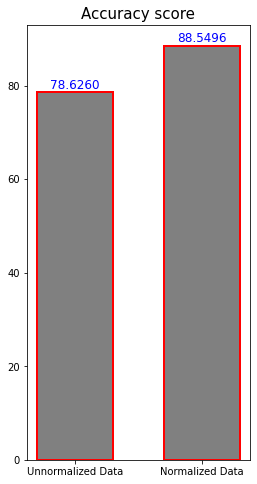

In [64]:
xx = ['Unnormalized Data', 'Normalized Data']
yy = [accuracy_score1, accuracy_score2]

fig, ax = plt.subplots(figsize=(4, 8))
ax.bar(
    x=xx,  # Matplotlib自动将非数值变量转化为x轴坐标
    height=yy,  # 柱子高度，y轴坐标
    width=0.6,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
    edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  # 柱子边框线的大小
)
ax.set_title("Accuracy score", fontsize=15)

xticks = ax.get_xticks()
for i in range(len(yy)):
    xy = (xticks[i], yy[i] * 1.01)
    s = str(format(yy[i],'.4f'))
    ax.annotate(
        s=s,  # 要添加的文本
        xy=xy,  # 将文本添加到哪个位置
        fontsize=12,  # 标签大小
        color="blue",  # 标签颜色
        ha="center",  # 水平对齐
        va="baseline"  # 垂直对齐
    )
plt.show()

## Which attribute has played most important role in credit card request decision?

In [42]:
#print(logreg3.coef_)
importances = np.maximum(logreg3.coef_,-logreg3.coef_)
temp = importances.sum()

# importances[0][1]
for i in range(importances.size):
    importances[0][i] = importances[0][i]/temp

importances


array([[0.00202047, 0.01625555, 0.0826966 , 0.03968328, 0.03968328,
        0.0029588 , 0.05173773, 0.09513306, 0.31309402, 0.11002711,
        0.09012512, 0.01962006, 0.13696493]])

In [43]:
importances2 = importances.flatten()
importances2

array([0.00202047, 0.01625555, 0.0826966 , 0.03968328, 0.03968328,
       0.0029588 , 0.05173773, 0.09513306, 0.31309402, 0.11002711,
       0.09012512, 0.01962006, 0.13696493])

In [45]:
features = ['Male','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','Citizen','Income']

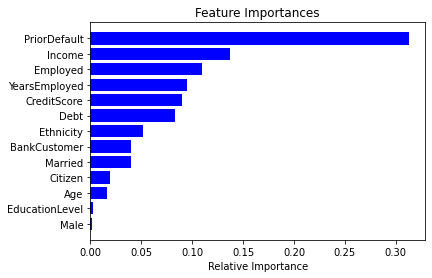

In [47]:
indices = np.argsort(importances2)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances2[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()